In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.contrib.layers import xavier_initializer
from forward import forward
from __future__ import print_function
print(tf.__version__)

1.1.0


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('../VAE/Datasets/MNIST_data', one_hot=True)
n_train_samples = mnist.train.num_examples
n_test_samples = mnist.test.num_examples
print(n_train_samples)

Extracting ../VAE/Datasets/MNIST_data/train-images-idx3-ubyte.gz
Extracting ../VAE/Datasets/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../VAE/Datasets/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../VAE/Datasets/MNIST_data/t10k-labels-idx1-ubyte.gz
55000


In [3]:
with tf.name_scope("input"):  
  x = tf.placeholder(tf.float32, [None, 784], name='x-input')
  labels = tf.placeholder(tf.float32, [None, 10], name='y-input')
  
with tf.name_scope("layers"):
  logits = forward(x)
  probabilities = tf.nn.softmax(logits)

with tf.name_scope("loss"):
  cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels)

  loss = tf.reduce_mean(cross_entropy)

  train_op = tf.train.GradientDescentOptimizer(0.1).minimize(loss)


#jensen = cross_entropy + tf.nn.softmax_cross_entropy_with_logits(logits=labels, labels=logits)
#loss2 = tf.reduce_mean(jensen)
#train_op2 = tf.train.GradientDescentOptimizer(0.1).minimize(loss2)

In [4]:
with tf.name_scope("Accuracy"):  
  correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1), name="correct_prediction")
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name="accuracy")

In [5]:
var_list=tf.trainable_variables()

In [6]:
TRAINING_STEPS = 20000

In [ ]:
with tf.Session() as sess:
  tf.global_variables_initializer().run()
  validate_feed = {x: mnist.validation.images, labels: mnist.validation.labels}
  test_feed = {x: mnist.test.images, labels: mnist.test.labels} 
  saver = tf.train.Saver()
  ave = 0
  for i in range(TRAINING_STEPS):
    
    if i % 1000 == 0:
      
      validate_acc, validate_loss = sess.run([accuracy, loss], feed_dict=validate_feed)
      print("After %d training step(s), validation accuracy %g, valid loss %g" % (i, validate_acc, validate_loss))
            
      
    xs,ys=mnist.train.next_batch(64)
    _, loss_val = sess.run([train_op, loss],feed_dict={x:xs,labels:ys})
    ave += loss_val
    if i % 1000 == 0 and i != 0:
      saver.save(sess, "save/" + 'AT.ckpt', global_step=i)
      ave = ave / 1000
      print("Train loss %g" % ave)
      print("--------------------------------\n")
      ave = 0
    
  test_acc, test_loss=sess.run([accuracy, loss],feed_dict=test_feed)
  print(("After %d training step(s), test accuracy %g, test loss %g" %(TRAINING_STEPS, test_acc, test_loss)))
  
writer = tf.summary.FileWriter("ad.log", tf.get_default_graph())
writer.close()

After 0 training step(s), validation accuracy 0.0742, valid loss 2.71572
After 1000 training step(s), validation accuracy 0.951, valid loss 0.183857
Train loss 0.308581
--------------------------------

After 2000 training step(s), validation accuracy 0.9624, valid loss 0.138677
Train loss 0.161007
--------------------------------

After 3000 training step(s), validation accuracy 0.9704, valid loss 0.113131
Train loss 0.116866
--------------------------------

After 4000 training step(s), validation accuracy 0.9738, valid loss 0.0995903
Train loss 0.0930957
--------------------------------

After 5000 training step(s), validation accuracy 0.9758, valid loss 0.0868728
Train loss 0.0769087
--------------------------------

After 6000 training step(s), validation accuracy 0.9762, valid loss 0.0854313
Train loss 0.063423
--------------------------------

After 7000 training step(s), validation accuracy 0.9782, valid loss 0.0772997
Train loss 0.0534674
--------------------------------

Afte

#### Read models and analysis

In [7]:
sess = tf.Session()
ckpt = tf.train.get_checkpoint_state("save")
sess.run(tf.global_variables_initializer())
restorer = tf.train.Saver(var_list=var_list[0:2])
restorer.restore(sess, ckpt.model_checkpoint_path)

INFO:tensorflow:Restoring parameters from save/AT.ckpt-19000


In [8]:
x_sample, labels = mnist.test.next_batch(100)
labels = [np.argmax(i) for i in labels]

In [9]:
probabilities_val = sess.run(probabilities, feed_dict={x: x_sample})

predictions = [np.argmax(i) for i in probabilities_val]
probabilities_val = [np.around(i, decimals=3) for i in probabilities_val]

In [10]:
for i in range(5):
  result = labels[i] == predictions[i] 
  print(labels[i], predictions[i], result)
  print(list(probabilities_val[i]))
  print("\n")

5 0 False
[0.322, 0.249, 0.011, 0.285, 0.132]


8 3 False
[0.152, 0.15000001, 0.105, 0.47499999, 0.117]


7 0 False
[0.68699998, 0.059, 0.0040000002, 0.013, 0.237]


4 0 False
[0.48199999, 0.29100001, 0.018999999, 0.017000001, 0.192]


2 0 False
[0.58999997, 0.23899999, 0.012, 0.0070000002, 0.152]




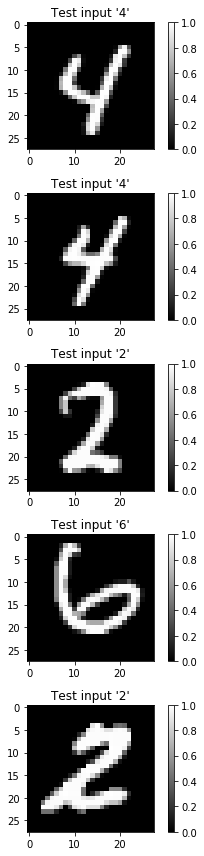

In [64]:
plt.figure(figsize=(8, 12))
for i in range(5):
    plt.subplot(5, 2, 2*i + 1)
    plt.imshow(x_sample[i].reshape(28, 28), vmin=0, vmax=1, cmap="gray")
    plt.title("Test input '%d'" % labels[i])
    plt.colorbar()
    plt.tight_layout()